In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', 300)

In [2]:
df = pd.read_csv("Life Expectancy Data.csv")

In [3]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Let's get some overall info on the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

Columns have weird spacing. Let's fix that.

In [5]:
df.columns = df.columns.str.strip().str.replace(" ","_").str.lower()
df.rename(columns={"thinness__1-19_years": "thinness__10-19_years"}, inplace=True)


Looks like we have 20 quant and 2 cat features. Let's inspect the distribution of the quants below...

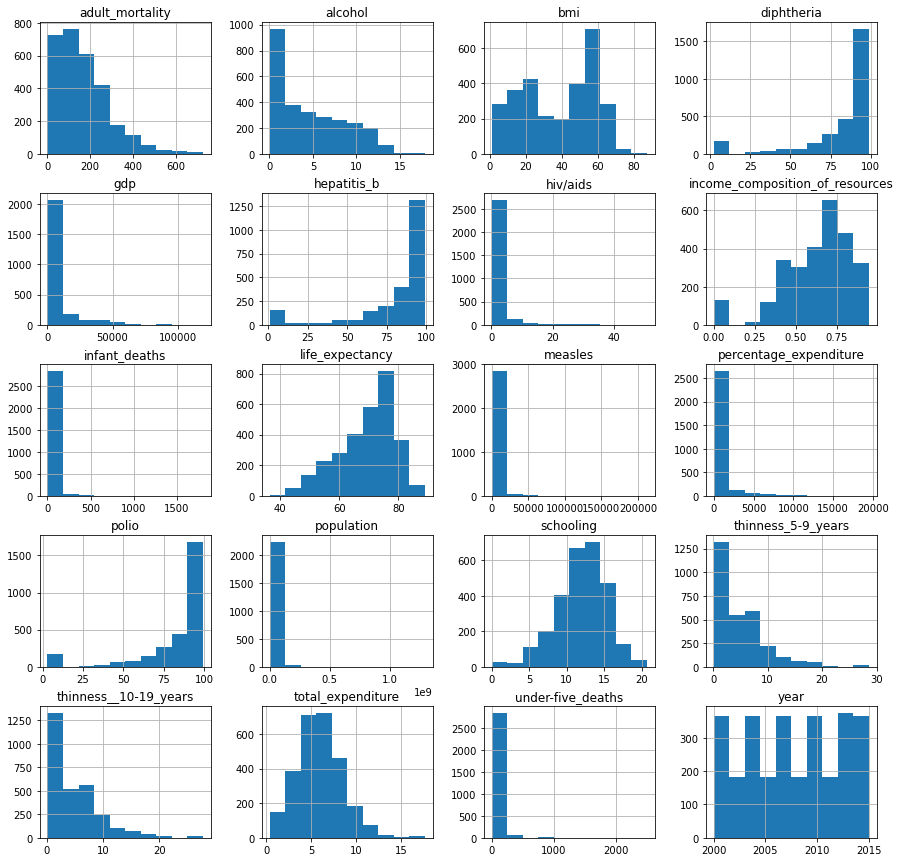

In [6]:
df.hist(figsize=(15,15))
plt.show()

Let us see a heatmap to get a visual of the missing values

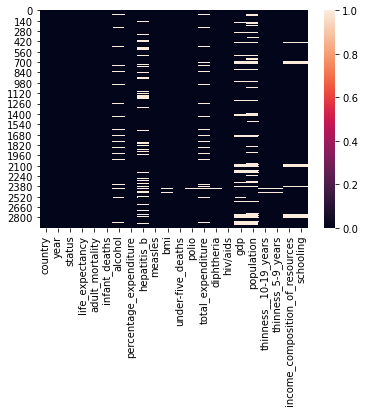

In [7]:
sns.heatmap(pd.isnull(df))

In [8]:
df.isna().sum()

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under-five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                448
population                         652
thinness__10-19_years               34
thinness_5-9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

### Deal with missing life expectancy

Since we are going to predict life expectancy, let us drop those null values since we don't want to impute our dependent variable.

In [9]:
df.drop(df[df['life_expectancy'].isna()].index, inplace=True)

### Deal with missing adult mortality

Adult mortality is skewed to the right, so instead of replacing the nulls with the mean, it makes more sense to replace with the median. The below cell will impute the median into the missing values

In [10]:
df['adult_mortality']=df['adult_mortality'].fillna(value=df['adult_mortality'].median())


### Deal with missing Alcohol

If we groupby country, we notice a very different value for the median alcohol consumption. Therefore, to impute missing acohol values, we will use the median by country.

In [11]:
country = df.groupby('country').median()['alcohol'].index
alc_score = df.groupby('country').median()['alcohol']
country_alc = list(zip(country, alc_score))
country_alc_dict = dict()

for item in country_alc:
    country_alc_dict[item[0]] = item[1]
    


In [12]:
missing_alc_index = df[df.alcohol.isna()].country.map(country_alc_dict).index
missing_alc_values = df[df.alcohol.isna()].country.map(country_alc_dict)
df.loc[missing_alc_index, 'alcohol'] = missing_alc_values

**South Sudan has zero values for alcohol across the board, so we will replace these with the median of developing**

In [13]:
#developing_alc
median_developing = df.groupby('status').median()['alcohol'][1]
df.alcohol = np.where(df.alcohol.isna(), median_developing, df.alcohol)

In [14]:
df.alcohol.isna().sum()

0

### Deal with missing Hepatitis B

We will impute values for hepatitis b in a similar manner to alcohol by using the countries median

In [15]:
country = df.groupby('country').median()['hepatitis_b'].index
hep_score = df.groupby('country').median()['hepatitis_b']
country_hep = list(zip(country, hep_score))
country_hep_dict = dict()

for item in country_hep:
    country_hep_dict[item[0]] = item[1]


In [16]:
missing_hep_index = df[df.hepatitis_b.isna()].country.map(country_hep_dict).index
missing_hep_values = df[df.hepatitis_b.isna()].country.map(country_hep_dict)
df.loc[missing_hep_index, 'hepatitis_b'] = missing_hep_values

In [17]:
df.hepatitis_b.isna().sum()

144

We are still missing data, which means some countries were missing all this feature. Let's replace the remaining by the median of developing vs developed countries

In [18]:
df[df.hepatitis_b.isna()].status.value_counts()

Developed     128
Developing     16
Name: status, dtype: int64

In [19]:
developed = df.groupby('status').median()['hepatitis_b'][0]
developing = df.groupby('status').median()['hepatitis_b'][1]
developed, developing

(95.0, 89.0)

In [20]:
df.loc[df[(df.hepatitis_b.isna()) & (df.status == 'Developed')].index, 'hepatitis_b'] = developed
df.loc[df[(df.hepatitis_b.isna()) & (df.status == 'Developing')].index, 'hepatitis_b'] = developing

In [21]:
df.hepatitis_b.isna().sum()

0

### Deal with missing BMI

We will impute values for bmi in a similar manner to alcohol by using the countries median

In [22]:
country = df.groupby('country').median()['bmi'].index
bmi_score = df.groupby('country').median()['bmi']
country_bmi = list(zip(country, bmi_score))
country_bmi_dict = dict()

for item in country_bmi:
    country_bmi_dict[item[0]] = item[1]

In [23]:
missing_bmi_index = df[df.bmi.isna()].country.map(country_bmi_dict).index
missing_bmi_values = df[df.bmi.isna()].country.map(country_bmi_dict)
df.loc[missing_bmi_index, 'bmi'] = missing_bmi_values

In [24]:
df.bmi.isna().sum()

32

We are still missing data, which means some countries were missing all this feature. Let's replace the remaining by the median of developing vs developed countries

In [25]:
df[df.bmi.isna()].status.value_counts()

Developing    32
Name: status, dtype: int64

In [26]:
developed = df.groupby('status').median()['bmi'][0]
developing = df.groupby('status').median()['bmi'][1]
developed, developing

(57.45, 35.150000000000006)

In [27]:
df.loc[df[(df.bmi.isna()) & (df.status == 'Developed')].index, 'bmi'] = developed
df.loc[df[(df.bmi.isna()) & (df.status == 'Developing')].index, 'bmi'] = developing

In [28]:
df.bmi.isna().sum()

0

### Deal with missing Polio

We will impute values for bmi in a similar manner to alcohol by using the countries median

In [29]:
country = df.groupby('country').median()['polio'].index
pol_score = df.groupby('country').median()['polio']
country_pol = list(zip(country, pol_score))
country_pol_dict = dict()

for item in country_pol:
    country_pol_dict[item[0]] = item[1]

In [30]:
missing_pol_index = df[df.polio.isna()].country.map(country_pol_dict).index
missing_pol_values = df[df.polio.isna()].country.map(country_pol_dict)
df.loc[missing_pol_index, 'polio'] = missing_pol_values

In [31]:
df.polio.isna().sum()

0

### Deal with missing Total expenditure

We will impute values for total expenditure in a similar manner to alcohol by using the countries median

In [32]:
country = df.groupby('country').median()['total_expenditure'].index
exp_score = df.groupby('country').median()['total_expenditure']
country_exp = list(zip(country, exp_score))
country_exp_dict = dict()

for item in country_exp:
    country_exp_dict[item[0]] = item[1]

In [33]:
missing_exp_index = df[df.total_expenditure.isna()].country.map(country_exp_dict).index
missing_exp_values = df[df.total_expenditure.isna()].country.map(country_exp_dict)
df.loc[missing_exp_index, 'total_expenditure'] = missing_exp_values

In [34]:
df.total_expenditure.isna().sum()

32

We are still missing data, which means some countries were missing all this feature. Let's replace the remaining by the median of developing vs developed countries

In [35]:
df[df.total_expenditure.isna()].status.value_counts()

Developing    32
Name: status, dtype: int64

In [36]:
developed = df.groupby('status').median()['total_expenditure'][0]
developing = df.groupby('status').median()['total_expenditure'][1]
developed, developing

(7.895, 5.39)

In [37]:
df.loc[df[(df.total_expenditure.isna()) & (df.status == 'Developed')].index, 'total_expenditure'] = developed
df.loc[df[(df.total_expenditure.isna()) & (df.status == 'Developing')].index, 'total_expenditure'] = developing

In [38]:
df.total_expenditure.isna().sum()

0

### Deal with missing Diphtheria

We will impute values for diphtheria in a similar manner to alcohol by using the countries median

In [39]:
country = df.groupby('country').median()['diphtheria'].index
dip_score = df.groupby('country').median()['diphtheria']
country_dip = list(zip(country, dip_score))
country_dip_dict = dict()

for item in country_dip:
    country_dip_dict[item[0]] = item[1]

In [40]:
missing_dip_index = df[df.diphtheria.isna()].country.map(country_dip_dict).index
missing_dip_values = df[df.diphtheria.isna()].country.map(country_dip_dict)
df.loc[missing_dip_index, 'diphtheria'] = missing_dip_values

In [41]:
df.diphtheria.isna().sum()

0

### Deal with missing GDP

Note, we did this section two ways and will go with a different method seen in a separate notebook. Will merge in the clean values from a separate csv

Lots of missing GDP. Some countries are missing every year's worth of GDP. We grabbed this missing info off the web, create a new dataframe, and then pull the values in on a per country/year basis for missing gdp. This will fix the countries with ALL the gdp missing. For the remaining countries, we will impute by country median as we did in prior imputes.

In [42]:
# miss_gdp = df[df.gdp.isnull()].country.value_counts()
# countries_missing_all_gdp = list(miss_gdp[miss_gdp == 16].index)

In [43]:
# gdp = pd.read_excel('Download-GDPPC-USD-countries.xlsx', header = 2)

In [44]:
#gdp.Country.unique()

In [45]:
# subset = ['Country', 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
#           2009, 2010, 2011, 2012, 2013, 2014, 2015]
# gdp = gdp[subset]
# countries = ['Bahamas', 'Bolivia (Plurinational State of)', 'Congo', "Côte d'Ivoire", 
#              'Czechia', 'D.P.R. of Korea', 'D.R. of the Congo', 'Egypt', 'Eritrea', 'Gambia', 
#              'Iran (Islamic Republic of)', 'Iraq', 'Kyrgyzstan', "Lao People's DR", 'Libya', 
#              'Micronesia (FS of)', 'Papua New Guinea', 'Republic of Korea', 
#              'Republic of Moldova', 'Saint Lucia', 'Sao Tome and Principe', 'Slovakia', 
#              'Somalia', 'South Sudan', 'St. Vincent and the Grenadines', 'Sudan', 
#              'Sudan (Former)', 'U.R. of Tanzania: Mainland', 
#              'United Kingdom', 'United States', 'Venezuela (Bolivarian Republic of)', 
#              'Viet Nam', 'Yemen','North Macedonia']
# gdp = gdp[gdp.Country.isin(countries)]
# gdp.set_index('Country', inplace = True)
# gdp = gdp.T

In [46]:
#countries_missing_all_gdp

In [47]:
# bahamas_gdp = gdp['Bahamas']
# bahamas_gdp#.iloc[-1]
# #bahamas_gdp.iloc[0]
# #bahamas_gdp[-0]
# bahamas_gdp.iloc[15]

In [48]:
# ## We noticed difference in column names, so we had to rename them. The commented out try/except prints a couple cells
# ## down shows how we determined which columns had name mismatches

# gdp.rename(columns={"Lao People's DR": "Lao People's Democratic Republic",
#                    "United States": "United States of America",
#                    "St. Vincent and the Grenadines":"Saint Vincent and the Grenadines",
#                     "United Kingdom": "United Kingdom of Great Britain and Northern Ireland",
#                     "U.R. of Tanzania: Mainland":"United Republic of Tanzania",
#                     "D.R. of the Congo":"Democratic Republic of the Congo",
#                     "North Macedonia":"The former Yugoslav republic of Macedonia",
#                     "Micronesia (FS of)":"Micronesia (Federated States of)",
#                     "D.P.R. of Korea":"Democratic People's Republic of Korea"
#                    }, inplace=True)

In [49]:
# def fix_missing_gdp(col):
#     gdp_col = gdp[col]
#     for i, year in enumerate(df[(df.country == col) & (df.gdp.isna())].gdp):
#         yr = 2015-i
#         gdp_temp = gdp_col.iloc[15-i]
#         df.loc[(df.country == col) & (df.gdp.isna()) & (df.year == yr), 'gdp'] = gdp_temp

In [50]:
# for i, country in enumerate(countries_missing_all_gdp):
#     fix_missing_gdp(country)
# #     try:
# #         print(country, gdp[country].mean())
# #     except:
# #         print(i, "column not found")

In [51]:
# df[df.gdp.isnull()].country.value_counts()

**For the remaining missing values, we will impute using the country median**

In [52]:
# country = df.groupby('country').median()['gdp'].index
# gdp_score = df.groupby('country').median()['gdp']
# country_gdp = list(zip(country, gdp_score))
# country_gdp_dict = dict()

# for item in country_gdp:
#     country_gdp_dict[item[0]] = item[1]

In [53]:
# missing_gdp_index = df[df.gdp.isna()].country.map(country_gdp_dict).index
# missing_gdp_values = df[df.gdp.isna()].country.map(country_gdp_dict)
# df.loc[missing_gdp_index, 'gdp'] = missing_gdp_values

In [54]:
# df.gdp.isna().sum()

### Deal with missing Population

Note, we did this section two ways and will go with a different method seen in a separate notebook. Will merge in the clean values from a separate csv

In [55]:
# pop_df = pd.read_csv("API_SP.POP.TOTL_DS2_en_csv_v2_1345178.csv")

In [56]:
# to_drop = []
# for i in range(1960, 2000):
#     to_drop.append(str(i))
# for i in range(2016,2020):
#     to_drop.append(str(i))
# pop_df.drop(to_drop, axis=1, inplace=True)
# pop_df.drop(['Country Code', 'Indicator Code', 'Indicator Name'], inplace=True, axis=1)

In [57]:
# pop_df = pop_df.set_index('Country Name').T

Figure out which countries are missing populations

In [58]:
# countries_missing_pop = list(df[df.population.isna()].country.value_counts()[0:-1].index)

In [59]:
# countries_missing_pop[:5]

In [60]:
# pop_df.rename(columns={
#                     "Yemen, Rep.":"Yemen",
#                     "United States":"United States of America",
#                     "Vietnam":"Viet Nam",
#                     "North Macedonia":"The former Yugoslav republic of Macedonia",
#                     "Bolivia":"Bolivia (Plurinational State of)",
#                     "Czech Republic":"Czechia",
#                     "Bahamas, The":"Bahamas",
#                     "Iran, Islamic Rep.":"Iran (Islamic Republic of)",
#                     "Korea, Rep.":"Republic of Korea",
#                     "Congo, Rep.":"Congo",
#                     "Congo, Dem. Rep.":"Democratic Republic of the Congo",
#                     "Egypt, Arab Rep.":"Egypt",
#                     "Korea, Dem. People’s Rep.":"Democratic People's Republic of Korea",
#                     "Tanzania":"United Republic of Tanzania",
#                     "Kyrgyz Republic":"Kyrgyzstan",
#                     "Cote d'Ivoire":"Côte d'Ivoire",
#                     "Gambia, The":"Gambia",
#                     "Micronesia, Fed. Sts.":"Micronesia (Federated States of)",
#                     "Slovak Republic":"Slovakia",
#                     "Venezuela, RB":"Venezuela (Bolivarian Republic of)",
#                     "St. Vincent and the Grenadines":"Saint Vincent and the Grenadines",
#                     "Lao PDR":"Lao People's Democratic Republic",
#                     "United Kingdom":"United Kingdom of Great Britain and Northern Ireland",
#                     "St. Lucia":"Saint Lucia",
#                     "Moldova":"Republic of Moldova"
#                    }, inplace=True)

In [61]:
#pop_df['Libya']

In [62]:
#df[(df.country == 'Libya') & (df.population.isna())][['year', 'population']]

In [63]:
# def fix_missing_pop(col):
#     pop_col = pop_df[col]
#     for i, year in enumerate(df[(df.country == col) & (df.population.isna())].population):
#         yr = 2015-i
#         pop_temp = pop_col.iloc[15-i]
#         df.loc[(df.country == col) & (df.population.isna()) & (df.year == yr), 'population'] = pop_temp

In [64]:
# for i, country in enumerate(countries_missing_pop):
#     fix_missing_pop(country)
# #     try:
# #         print(country, pop_df[country].mean())
# #     except:
# #         print(i, "column not found")

In [65]:
# df.population.isna().sum()

At this point, we have only 4 missing values remaining. Let's impute these

In [66]:
# yearly_increase = (df[df.country == 'Eritrea'].population.max() - 
#                    df[df.country == 'Eritrea'].population.min()) / (2011-2000)

In [67]:
# Eritrea_pop_2012 = df[df.country == 'Eritrea'].population.max() + (381176.2727272727)
# Eritrea_pop_2013 = df[df.country == 'Eritrea'].population.max() + (2 * 381176.2727272727)
# Eritrea_pop_2014 = df[df.country == 'Eritrea'].population.max() + (3 * 381176.2727272727)
# Eritrea_pop_2015 = df[df.country == 'Eritrea'].population.max() + (4 * 381176.2727272727)

In [68]:
# df.loc[df[(df.country == 'Eritrea') & (df.year == 2012)].index, 'population'] = Eritrea_pop_2012
# df.loc[df[(df.country == 'Eritrea') & (df.year == 2013)].index, 'population'] = Eritrea_pop_2013
# df.loc[df[(df.country == 'Eritrea') & (df.year == 2014)].index, 'population'] = Eritrea_pop_2014
# df.loc[df[(df.country == 'Eritrea') & (df.year == 2015)].index, 'population'] = Eritrea_pop_2015

In [69]:
# df.population.isna().sum()

### Deal with missing thinness  10-19 years

Only Sudan and South Sudan are missing these. But, there are missing every year. We will impute by the median of developing countries, by year.

In [70]:
thin_10_19_year_median = dict(df[df.status == 'Developing'].groupby('year')['thinness__10-19_years'].median())

In [71]:
to_replace = df[(df['thinness__10-19_years'].isna())].year.map(thin_10_19_year_median).index
values = df[(df['thinness__10-19_years'].isna())].year.map(thin_10_19_year_median)
df.loc[to_replace, 'thinness__10-19_years'] = values

In [72]:
df['thinness__10-19_years'].isna().sum()

0

### Deal with missing thinness 5-9 years

Only Sudan and South Sudan are missing these. But, there are missing every year. We will impute by the median of developing countries, by year.

In [73]:
thin_5_9_year_median = dict(df[df.status == 'Developing'].groupby('year')['thinness_5-9_years'].median())

In [74]:
to_replace = df[(df['thinness_5-9_years'].isna())].year.map(thin_5_9_year_median).index
values = df[(df['thinness_5-9_years'].isna())].year.map(thin_5_9_year_median)
df.loc[to_replace, 'thinness_5-9_years'] = values

In [75]:
df['thinness_5-9_years'].isna().sum()

0

### Deal with missing Income composition of resources
Note, we did this section two ways and will go with a different method seen in a separate notebook. Will merge in the clean values from a separate csv

As seen below, every country that is missing is missing every single value. Again, for simplicity, we will replace by the median of each row based on its developed / developing status.

In [76]:
# df[df.income_composition_of_resources.isnull()].country.value_counts()

In [77]:
# developed = df.groupby('status').median()['income_composition_of_resources'][0]
# developing = df.groupby('status').median()['income_composition_of_resources'][1]
# developed, developing

In [78]:
# df.loc[df[(df.income_composition_of_resources.isna()) & 
#           (df.status == 'Developed')].index, 'income_composition_of_resources'] = developed

# df.loc[df[(df.income_composition_of_resources.isna()) & 
#           (df.status == 'Developing')].index, 'income_composition_of_resources'] = developing



In [79]:
# df.income_composition_of_resources.isna().sum()

### Deal with missing Schooling

Note, we did this section two ways and will go with a different method seen in a separate notebook. Will merge in the clean values from a separate csv

As seen below, every country that is missing is missing every single value. Again, for simplicity, we will replace by the median of each row based on its developed / developing status.

In [80]:
# df[df.schooling.isnull()].country.value_counts()

In [81]:
# developed = df.groupby('status').median()['schooling'][0]
# developing = df.groupby('status').median()['schooling'][1]
# developed, developing

In [82]:
# df.loc[df[(df.schooling.isna()) & (df.status == 'Developed')].index, 'schooling'] = developed

# df.loc[df[(df.schooling.isna()) & (df.status == 'Developing')].index, 'schooling'] = developing



In [83]:
# df.schooling.isna().sum()

## Pull in cleaned Pop, Gdp, IncomeComp, Schooling from other notebook's csv

In [84]:
df2 = pd.read_csv("cleaned_nulls.csv").drop("Unnamed: 0", axis=1)
df2 = df2[['gdp', 'population', 'income_composition_of_resources', 'schooling']]


In [85]:
df = df.reset_index().drop('index', axis=1)
df.drop(['gdp', 'population', 'income_composition_of_resources', 'schooling'], axis=1, inplace=True)

In [86]:
df = pd.concat([df,df2], axis=1)

### Confirm that all missing values are removed

In [87]:
df.isna().sum()

country                            0
year                               0
status                             0
life_expectancy                    0
adult_mortality                    0
infant_deaths                      0
alcohol                            0
percentage_expenditure             0
hepatitis_b                        0
measles                            0
bmi                                0
under-five_deaths                  0
polio                              0
total_expenditure                  0
diphtheria                         0
hiv/aids                           0
thinness__10-19_years              0
thinness_5-9_years                 0
gdp                                0
population                         0
income_composition_of_resources    0
schooling                          0
dtype: int64

## Issue with adult_mortality

We noticed that there are issues with this column while modeling. This feature is supposed to be a probability, a value between 0-100, where 88 == 88% liklihood. Many of the values are an order of magnitude X10 higher than they should be.

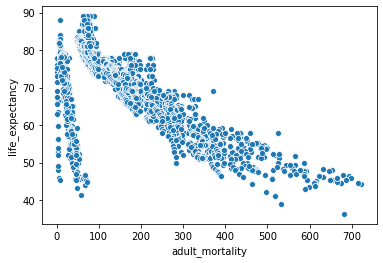

In [90]:
sns.scatterplot(df.adult_mortality, df.life_expectancy)

In [94]:
# Fix these values
df.adult_mortality = np.where(df.adult_mortality > 100, df.adult_mortality/10, df.adult_mortality)

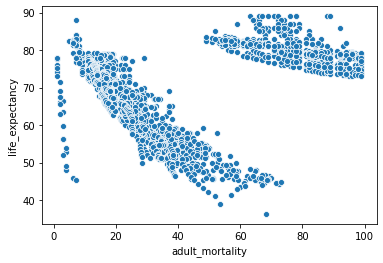

In [97]:
# Check to see if it was fixed
sns.scatterplot(df.adult_mortality, df.life_expectancy)

It is fixed, lo

In [89]:
df.to_csv("Life_Expectancy_No_Missing_Vals.csv")